# One Dimension

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
d1 = np.loadtxt("example_1.txt")
d2 = np.loadtxt("example_2.txt")

print(d1.shape, d2.shape)

(500,) (500,)


## Histogram Plot

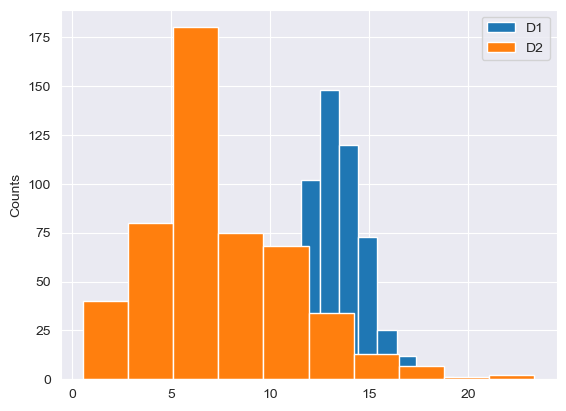

In [6]:
plt.hist(d1, label="D1")
plt.hist(d2, label="D2")
plt.legend()
plt.ylabel("Counts");

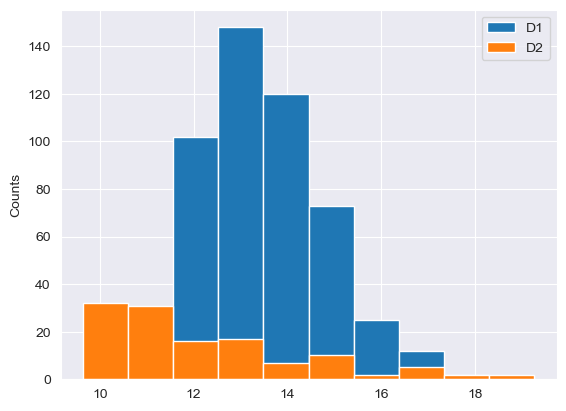

In [7]:
counts1, bins, _ = plt.hist(d1, bins=10, label="D1")
plt.hist(d2, bins=bins , label="D2")
plt.legend()
plt.ylabel("Counts");

`numpy.linspace` 함수는 지정된 범위 내에서 균일한 간격으로 일정 개수의 숫자를 생성하는 NumPy 함수입니다. 이 함수는 데이터 분석, 그래프 작성, 또는 수학적 계산에서 자주 사용됩니다.

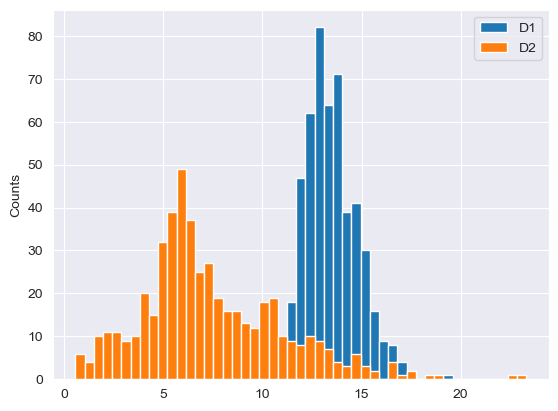

In [8]:
bins = np.linspace(min(d1.min(), d2.min()), max(d1.max(), d2.max()), 50)
counts1, _, _ = plt.hist(d1, bins=bins, label="D1")
plt.hist(d2, bins=bins , label="D2")
plt.legend()
plt.ylabel("Counts");

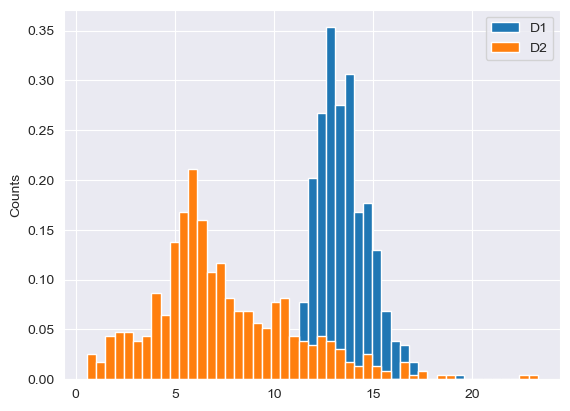

In [9]:
# 확률의 문제로 연결
bins = np.linspace(min(d1.min(), d2.min()), max(d1.max(), d2.max()), 50)
counts1, _, _ = plt.hist(d1, bins=bins, label="D1", density=True)
plt.hist(d2, bins=bins , label="D2", density=True)
plt.legend()
plt.ylabel("Counts");

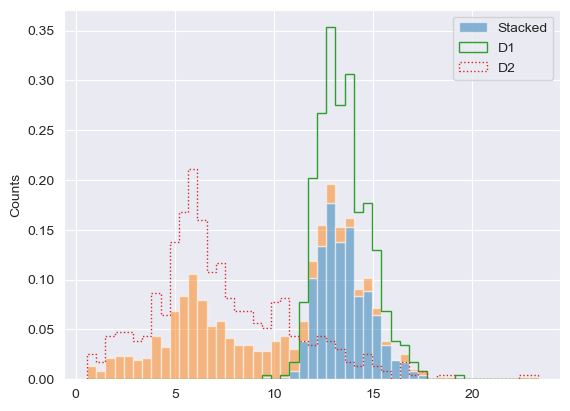

In [10]:
# 최적화
bins = np.linspace(min(d1.min(), d2.min()), max(d1.max(), d2.max()), 50)
plt.hist([d1, d2], bins=bins, label="Stacked", density=True, histtype="barstacked", alpha=0.5)
plt.hist(d1, bins=bins, label="D1", density=True, histtype = "step", lw=1)
plt.hist(d2, bins=bins , label="D2", density=True, histtype = "step", ls=":")
plt.legend()
plt.ylabel("Counts");

## Bee Swarm Plots

In [11]:
dataset = pd.DataFrame({
    "value": np.concatenate((d1, d2)),
    "type": np.concatenate((np.ones(d1.shape), np.zeros(d2.shape)))
})
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   1000 non-null   float64
 1   type    1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


<Axes: ylabel='value'>

/opt/homebrew/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 8.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


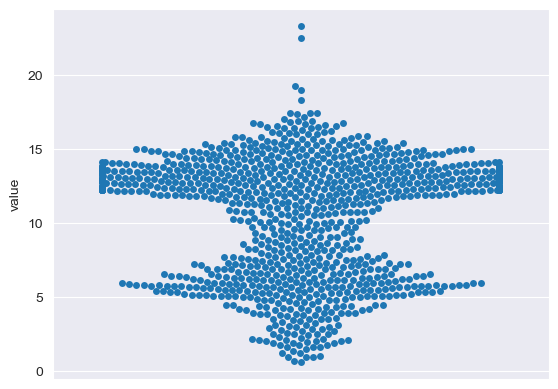

In [12]:
sns.swarmplot(dataset["value"])

<Axes: xlabel='type', ylabel='value'>

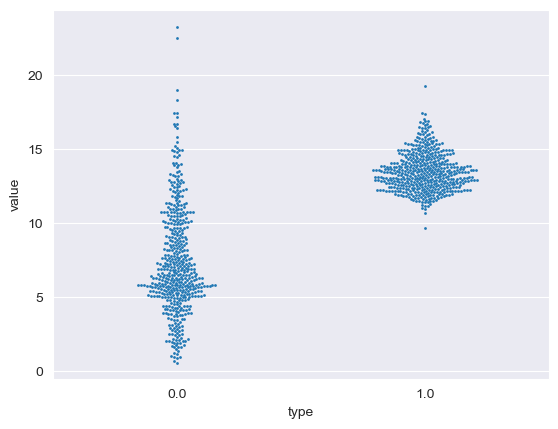

In [13]:
sns.swarmplot(x="type", y="value", data=dataset, size=2)

## Box Plots

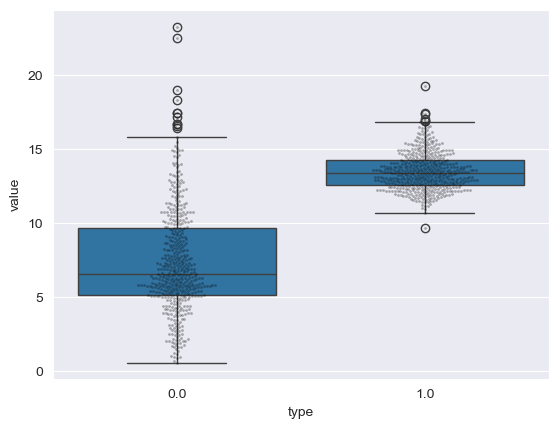

In [17]:
sns.boxplot(x="type", y="value", data=dataset)
sns.swarmplot(x="type", y="value", data=dataset, size=2, color="k", alpha=0.3);

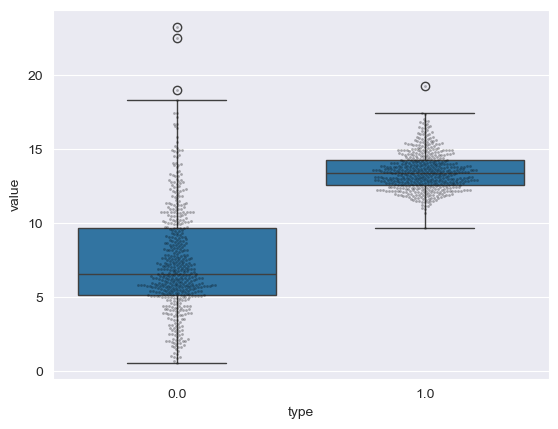

In [19]:
# 이상치를 다르게 변경하는 방법 whis!
sns.boxplot(x="type", y="value", data=dataset, whis=2.0)
sns.swarmplot(x="type", y="value", data=dataset, size=2, color="k", alpha=0.3);

## Violin Plots

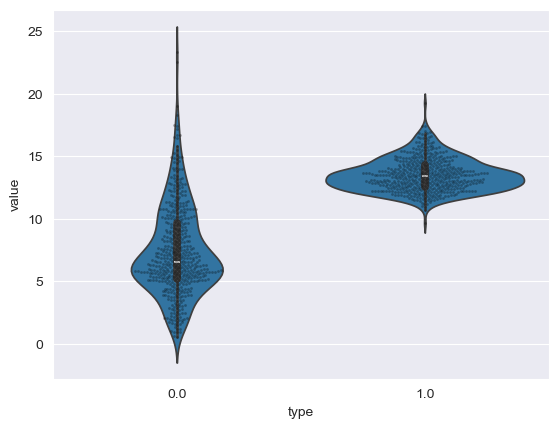

In [21]:
sns.violinplot(x="type", y="value", data=dataset)
sns.swarmplot(x="type", y="value", data=dataset, size=2, color="k", alpha=0.3);

<Axes: xlabel='type', ylabel='value'>

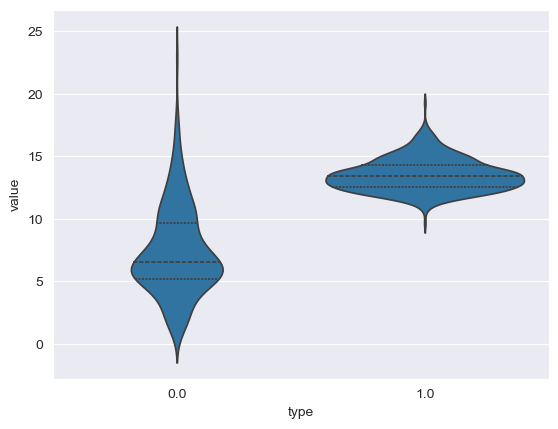

In [22]:
sns.violinplot(x="type", y="value", data=dataset, inner="quartile")

<Axes: xlabel='type', ylabel='value'>

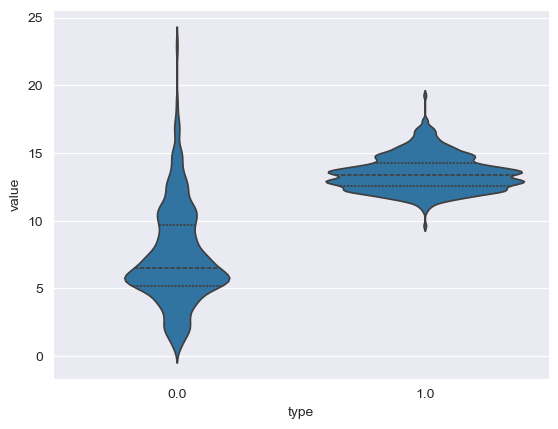

In [26]:
# 평활화 하기, bw 대신 bw_adjust 권장
sns.violinplot(x="type", y="value", data=dataset, inner="quartile", bw_adjust=0.5)


## Empirical Cumulative Distribution Functions

In [29]:
sd1 = np.sort(d1)
sd2 = np.sort(d2)
cdf = np.linspace(1/d1.size, 1, d1.size)

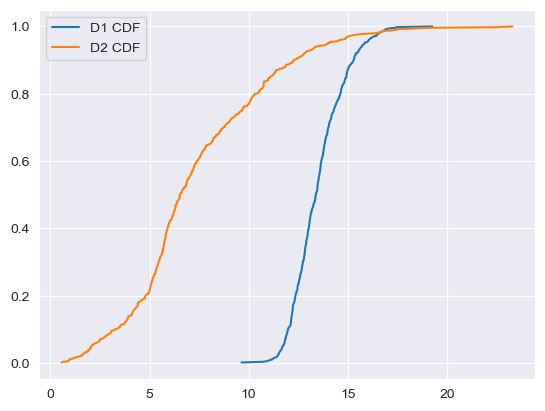

In [30]:
plt.plot(sd1, cdf, label = "D1 CDF")
plt.plot(sd2, cdf, label = "D2 CDF")
plt.legend();

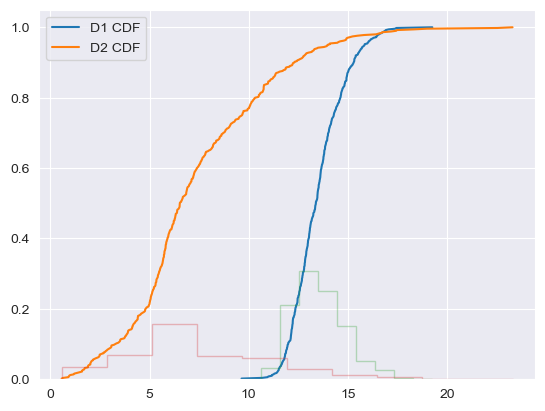

In [31]:
plt.plot(sd1, cdf, label = "D1 CDF")
plt.plot(sd2, cdf, label = "D2 CDF")
plt.hist(d1, histtype="step", density=True, alpha=0.3)
plt.hist(d2, histtype="step", density=True, alpha=0.3)
plt.legend();

## Describe

In [33]:
df = pd.DataFrame({"Data1" : d1, "Data2" : d2})
df.head()

,Data1,Data2
0,13.995,9.497
1,13.125,9.054
2,13.508,2.688
3,14.220,8.209
4,13.478,7.612


In [34]:
df.describe()

,Data1,Data2
count,500.000000,500.000000
mean,13.511172,7.390714
std,1.296363,3.589993
min,9.640000,0.568000
25%,12.572000,5.164750
50%,13.389500,6.531000
75%,14.291250,9.664500
max,19.262000,23.307000
